# Геннадий Балан

# Домашняя работа по Алгоритмам анализа данных № 7

# Тема: Классификация с помощью kNN. Кластеризация K-means

##### Задача 1
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:


import warnings
warnings.filterwarnings('ignore')

In [ ]:
Загрузим один из "игрушечных" датасетов из sklearn.

In [4]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [ ]:
Разделим выборку на обучающую и тестовую

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

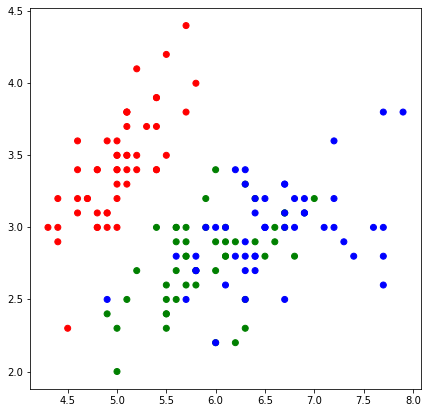

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [ ]:
Найдем веса для соседних точек,находящися на расстоянии d

In [ ]:
𝑤(𝑑)=1/(𝑑+𝑎) ,
брать вес  1/𝑑  по аналогии с номером соседа - неудачное решение, 
так как при  𝑑=0  вес будет бесконечно большим, что приводит к переобучению

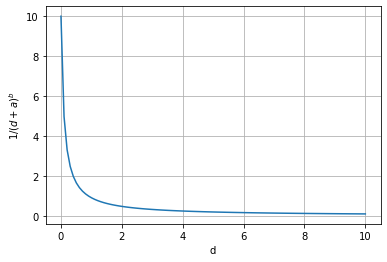

In [9]:
dots = np.linspace(0, 10, 100)
a = 0.1
value = list(map(lambda d: 1/(d + a), dots))

plt.xlabel('d')
plt.ylabel('$1/(d + a)^b$')
plt.grid()
plt.plot(dots, value);

In [ ]:
Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [10]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [ ]:
Реализуем алгоритм поиска k ближайших соседей.

In [11]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [12]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [ ]:
Напишем функцию для вычисления точности

In [13]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
Проверим работу алгоритма при различных k

In [14]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.733


In [ ]:
Построим график распределения классов.

In [15]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


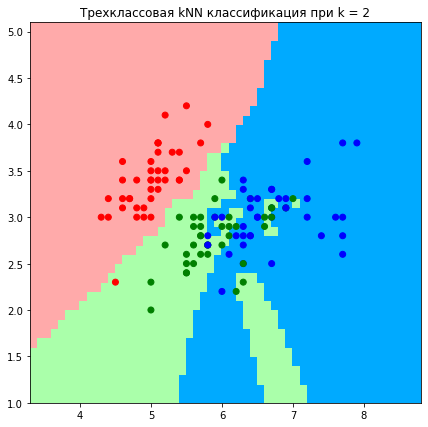

Wall time: 4.97 s


In [16]:
%%time
get_graph(X_train, y_train, k)

In [17]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


(2352, 2)


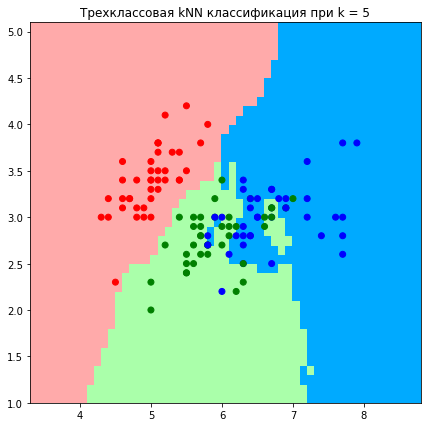

Wall time: 4.82 s


In [18]:
%%time
get_graph(X_train, y_train, k)

In [ ]:
Вывод:с добавлением весов для k ближайших точек,скорость обучения увеличилась в 4 раза

##### Задача 2
*Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [37]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((112, 2), (38, 2))

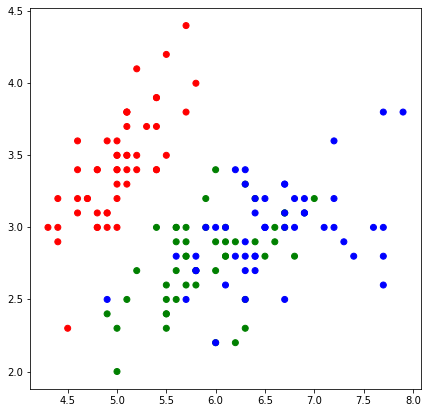

In [39]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [ ]:
Найдем веса для соседних точек,находящися на расстоянии d

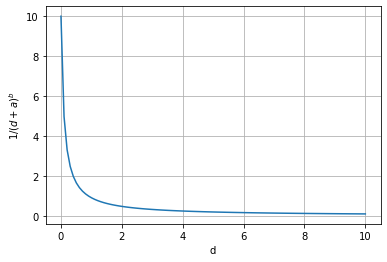

In [40]:
dots = np.linspace(0, 10, 100)
a = 0.1
value = list(map(lambda d: 1/(d + a), dots))

plt.xlabel('d')
plt.ylabel('$1/(d + a)^b$')
plt.grid()
plt.plot(dots, value);

In [ ]:
Используем среднее квадратичное внутрикластерное расстояние. Реализуем функцию для ее подсчета.

In [41]:
def vn_metrics(x, c_k, k):
    
    distance = np.sum(1 / (np.abs(k))) * (np.sum(np.square(x - c_k)))

    return distance

In [ ]:
Реализуем алгоритм поиска k ближайших соседей.

In [42]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [43]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [ ]:
Напишем функцию для вычисления точности

In [44]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
Проверим работу алгоритма при различных k

In [45]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.658


In [ ]:
Построим график распределения классов.

In [46]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


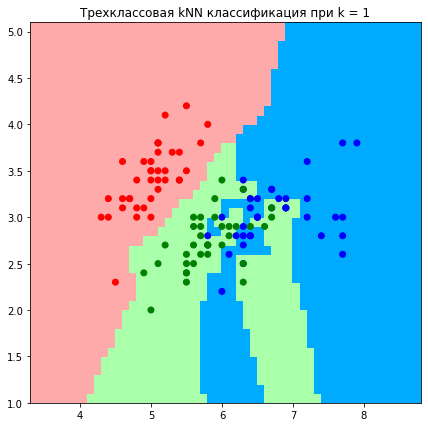

Wall time: 4.6 s


In [47]:
%%time
get_graph(X_train, y_train, k)

In [48]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.658


(2352, 2)


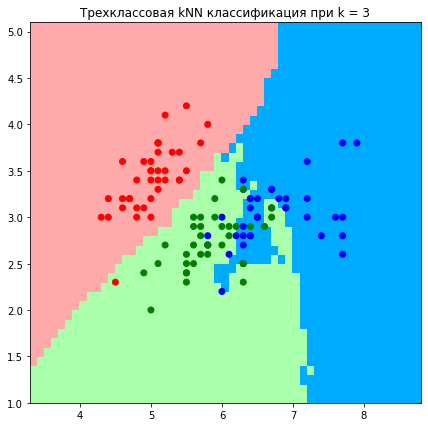

Wall time: 4.51 s


In [49]:
%%time
get_graph(X_train, y_train, k)

In [50]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.605


(2352, 2)


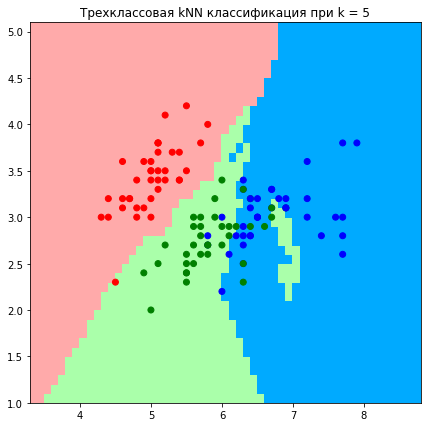

Wall time: 4.54 s


In [51]:
%%time
get_graph(X_train, y_train, k)

In [52]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.658


(2352, 2)


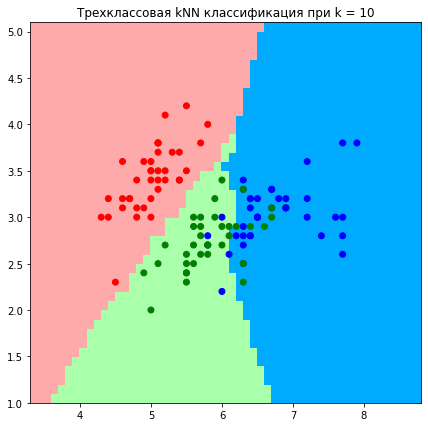

Wall time: 4.64 s


In [53]:
%%time
get_graph(X_train, y_train, k)

In [ ]:
ВЫвод: точность алгоритма выходит на асимптоту 0.658.Скоростью обучения с весами увеличилась в 4 раза.С увеличением K ,уменьшаются количество выбросов
    Но,точность всё-таки не достаточная